#Author - **JASHANDEEP SINGH**  <img align = right src="https://internship.thesparksfoundation.info/assests/img/logo.png" alt="drawing" width="100"/>  
##GRIP - The Spark Foundation- Data Science & Business Analytics Internship
#**TASK 3** **Exploratory Data Analysis - Retail**

####1) Perform 'Exploratory Data Analysis' on dataset "SampleSuperstore
####2) As a business manager, try to find out the weak areas where you can work to make more profit.
####3) What all business problems you can derive by exploring the data?

 # Exploratory Data Analysis on Superstore Data

### Objectives:- 
#### 1) To Perform Exploratory Data Analysis 
#### 2) Find out business problems
#### 3) identify key areas for improving profits.

### 1. Importing required packages and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
SuperStoreData = pd.read_csv("SampleSuperstore.csv")
# Initial Shape of the Data Frame
Initial_Shape = SuperStoreData.shape
Initial_Shape

(9994, 13)

### 2. Data Inspection

In [3]:
SuperStoreData.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
SuperStoreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


No null-valued cells present.

In [5]:
#Statistics of Numerical valued colums
SuperStoreData.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# 3. Data Cleaning

In [6]:
#Deleting Identicle rows to reduce noise from the data
SuperStoreData.drop_duplicates(keep='first',inplace=True) 

In [7]:
SuperStoreData

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [8]:
#Final Shape of the dataframe
Final_Shape = SuperStoreData.shape
Final_Shape

(9977, 13)

In [9]:
# Initial number of rows vs final
Initial_Shape[0]- Final_Shape[0]

17

### Note: 17 Identical Rows Identified  and removed !

## 4. Exploratory Data Analysis and Visulization 

### 4.1 What are total Sales and Profits of the company?

In [11]:
Sales_and_Profits = SuperStoreData.groupby("Segment").sum()
round(Sales_and_Profits,2) # Rounding Numericala entries to 2 decimal places

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288269634,1160832.77,19497,820.51,134007.44
Corporate,164108306,706070.13,11591,476.85,91954.98
Home Office,97903137,429292.68,6732,261.83,60279.00


In [13]:
Sales_and_Profits = Sales_and_Profits.iloc[:,[1,-1]].sum()
round(Sales_and_Profits,2)

Sales     2296195.59
Profit     286241.42
dtype: float64

###  Total Sales = 2,296,195.59 USD
### Total Profits = 286,241.42 USD

### 4.2 Top 10 States by Sales and Profits

In [14]:
Top_10_Sales = SuperStoreData.groupby("State").Sales.sum().nlargest(n =10)
Top_10_Profits = SuperStoreData.groupby("State").Profit.sum().nlargest(n =10)

In [15]:
Top_10_Sales.index

Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania',
       'Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'],
      dtype='object', name='State')

In [16]:
Top_10_Profits.index

Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'],
      dtype='object', name='State')

#### Top 10 States by Sales:
'California', 'New York', 'Texas', 'Washington', 'Pennsylvania','Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'
#### Top 10 States by Profit:
'California', 'New York', 'Washington', 'Michigan', 'Virginia','Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'

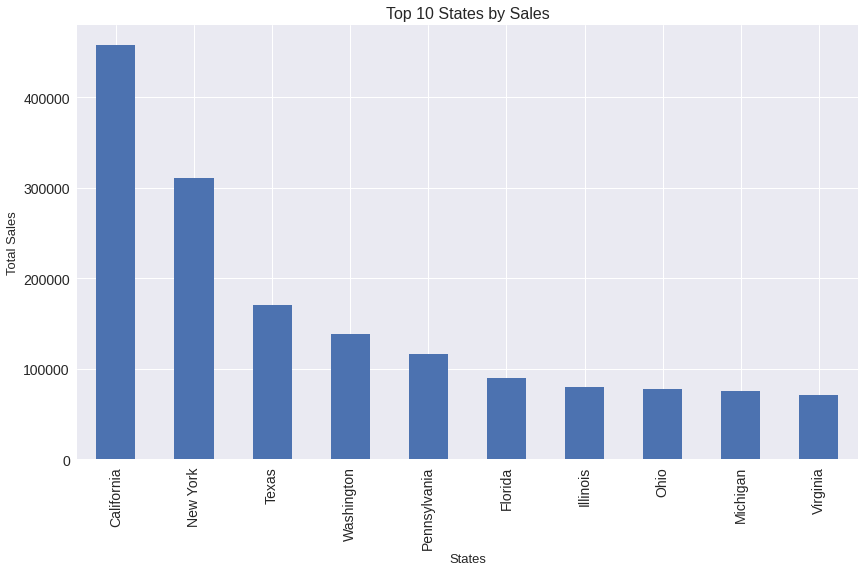

In [17]:
plt.style.use('seaborn')
Top_10_Sales.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top 10 States by Sales",fontsize =16)
plt.show()

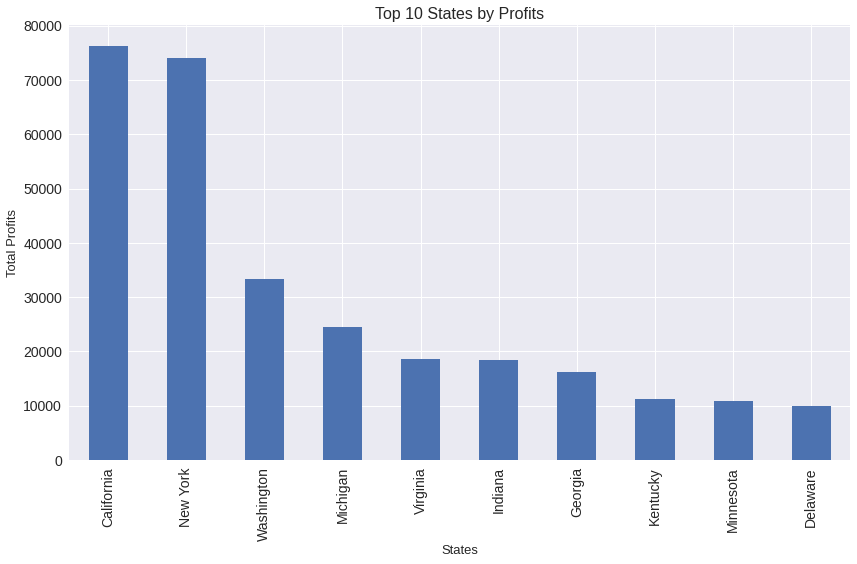

In [18]:
plt.style.use('seaborn')
Top_10_Profits.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Profits",fontsize =13)
plt.title("Top 10 States by Profits",fontsize =16)
plt.show()

## California and New York are far ahead of their competitor states.

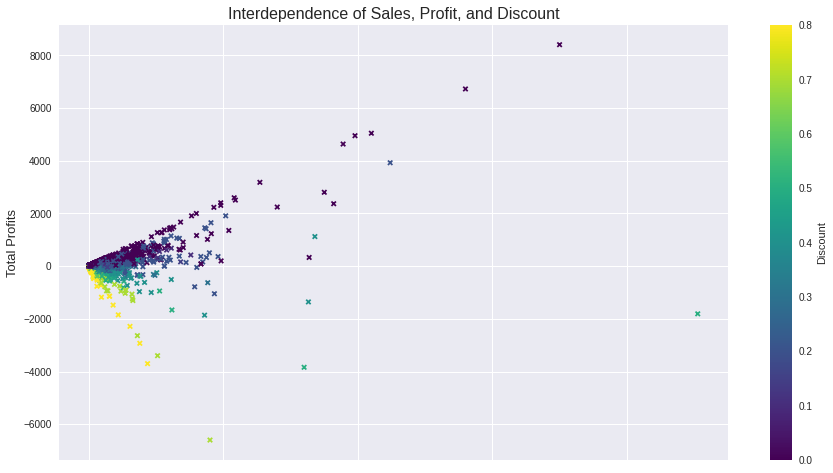

In [19]:
plt.style.use('seaborn')
SuperStoreData.plot(kind = "scatter", figsize = (15,8), x = "Sales", y ="Profit" ,c ="Discount", s =20, marker ="x",colormap ="viridis")
plt.ylabel("Total Profits",fontsize =13)
plt.title("Interdependence of Sales, Profit, and Discount",fontsize =16)
plt.show()

## Relation Analysis

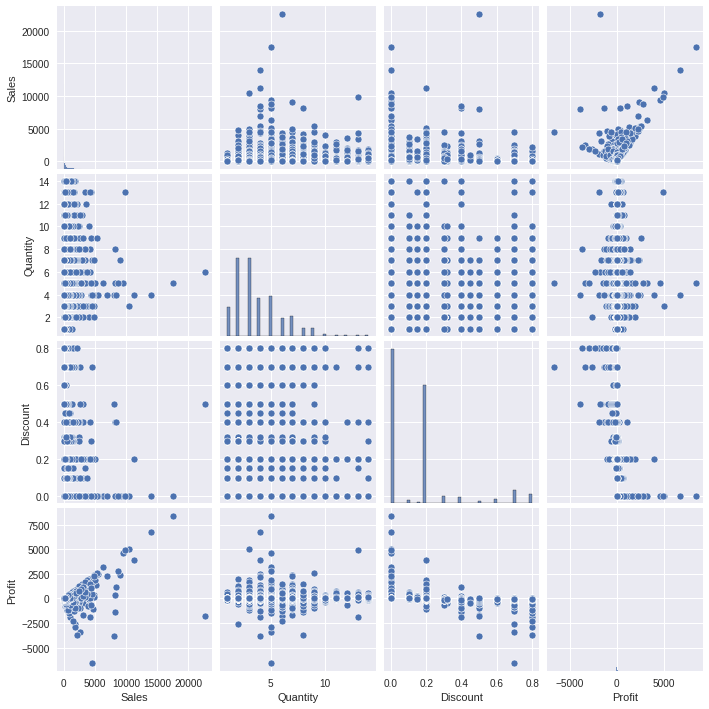

In [20]:
# Pair_plot
financial=SuperStoreData.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(financial)

In above we see that there is some relation between sales and profit and also there is some relation between Discount and Profit. Now To see what exact relation between those entities we plot the heat_map. so we get more clearity

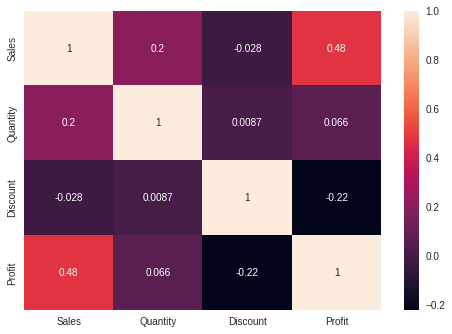

In [21]:
correlation=financial.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

From Above map we infer that, 1)sales and profits are positively correlated 2)Discount and Profits are Negatively correlated

Hence we consider these cases and proceed further

## Case-1 When Discount is 0

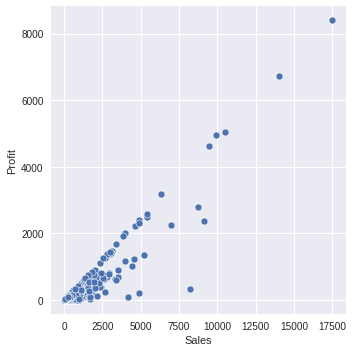

In [22]:
data=SuperStoreData[SuperStoreData['Discount']==0]
sns.relplot(x='Sales',y='Profit',data=data)

Hence we say that there positive relation between Profit and sales.when Discount is 0 Now we plot heat_map to get correlaton

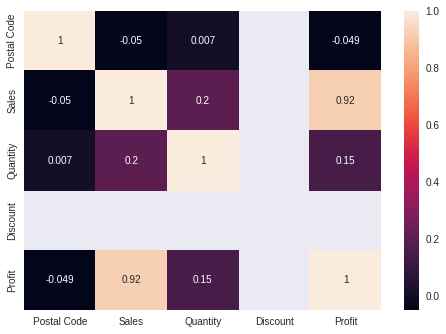

In [23]:
correlation=data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

Hence, we see that There is strong correlation between sales and Profit i.e 0.92

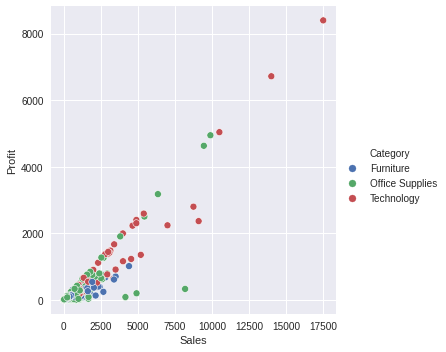

In [24]:
#Rel_plot with respect category
sns.relplot(x='Sales',y='Profit',hue='Category',data=data)

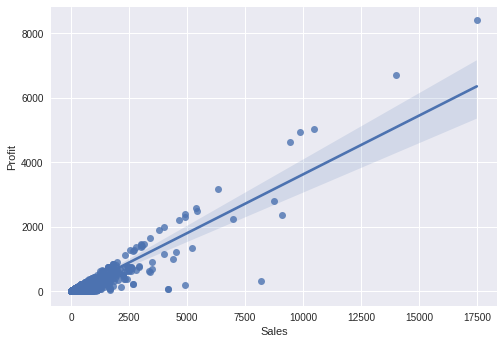

In [25]:
# Regression Plot 
sns.regplot(x=data['Sales'],y=data['Profit'])

There is positive trend between Profit and sales

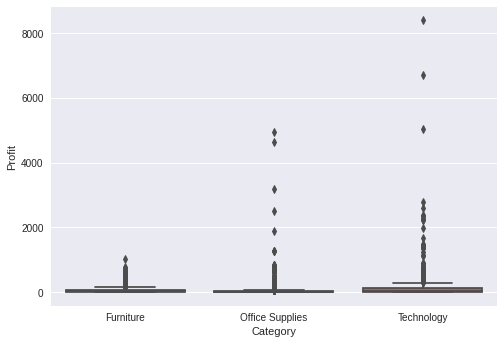

In [26]:
sns.boxplot(x='Category',y='Profit',data=data)

## Case-2 When Discount is Not 0

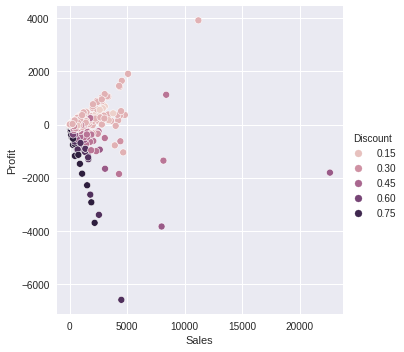

In [27]:
data1=SuperStoreData[SuperStoreData['Discount']!=0]
sns.relplot(x='Sales',y='Profit',hue='Discount',data=data1)

In above graph we see that as percentages of Discount increses the sales is also goes increses but profit goes decreases

Now we check how it can be effects on different sectors of businesses

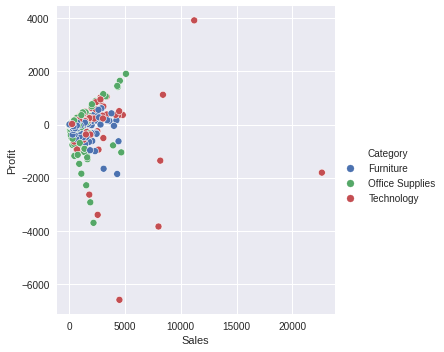

In [28]:
sns.relplot(x='Sales',y='Profit',hue='Category',data=data1)

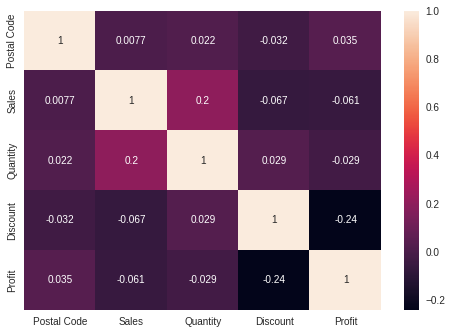

In [29]:
#realtion analysis
correlation=data1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

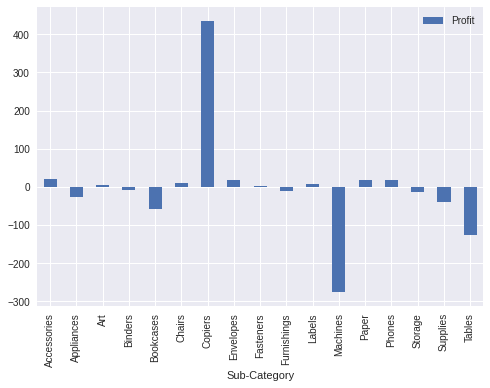

In [30]:
pivot=pd.pivot_table(data1,index='Sub-Category',values='Profit')
pivot.plot(kind='bar')

Here we see that copiers had highest Profit and Machines had highest loss

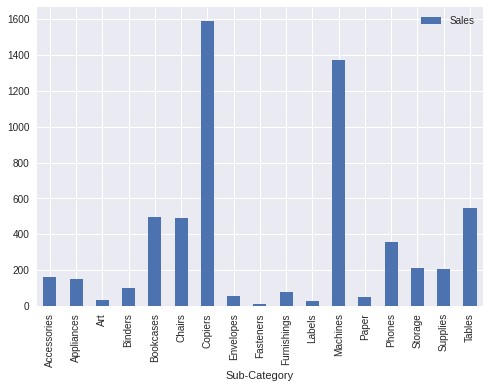

In [31]:
pivot=pd.pivot_table(data1,index='Sub-Category',values='Sales')
pivot.plot(kind='bar')

Here we see that copiers had highest sale and Machines had second highest sales

In above two graph we see that 'Machines' had second highest sale but due to large discount it is in loss and in second graph we see that sales in 'Fasteners','labels'and 'Art' category are so weak.so we have to concentrate on these sub-category businesses

### Discounts are triggering losses

### 4.3 Distrubution of Profits across diffrent regions

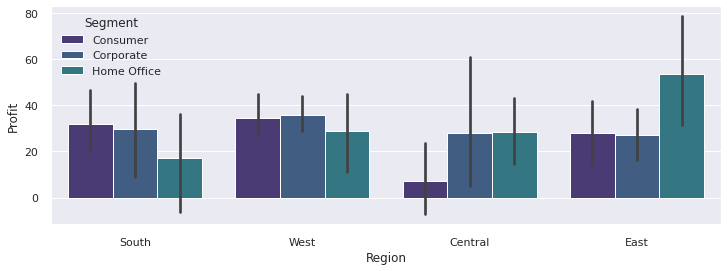

In [32]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = SuperStoreData , x = "Region",y = "Profit" ,hue = "Segment")
plt.show()

### Overall each Segment is profitable.
### 4.4 Profit distribution by Region

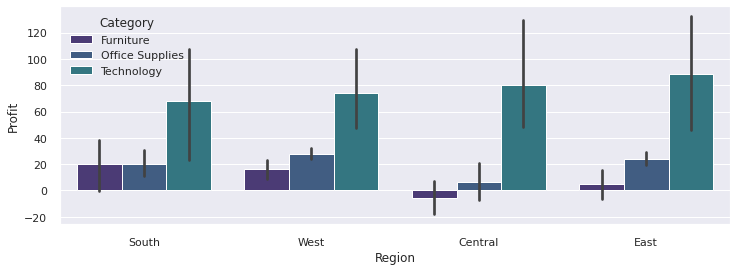

In [33]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = SuperStoreData , x = "Region",y = "Profit" ,hue = "Category")
plt.show()

## "Furniture" Category is the only loss making sector that to only in Central Region

### 4.5 Investigating losses in Furniture category in the Central region

In [34]:
# Grouping Data by Region and only slicing Data for Central Region from whole Data Set
gb_Central = list(SuperStoreData.groupby("Region"))[0][1]

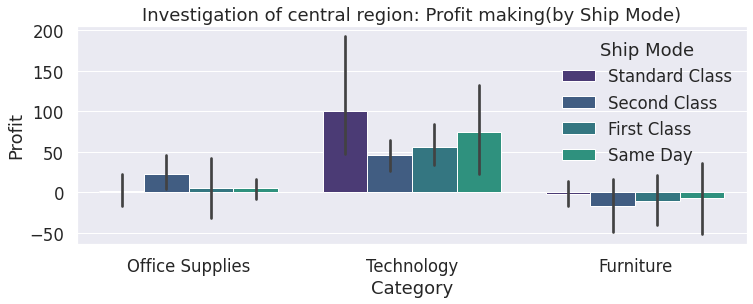

In [35]:
# Investing Further in cenral Region 
plt.figure(figsize = (12,4))
sns.set(font_scale=1.5, palette= "viridis")
sns.barplot(data = gb_Central, x = "Category",y = "Profit" ,hue = "Ship Mode")
plt.title("Investigation of central region: Profit making(by Ship Mode)")
plt.show()

### Losses are inccured in Furniture Cateory irrespective to ship mode in Central Region

In [36]:
# Slicing Furniture Data from whole data set
gb_Category_Furniture =list(list(SuperStoreData.groupby("Region"))[0][1].groupby("Category"))[0][1]

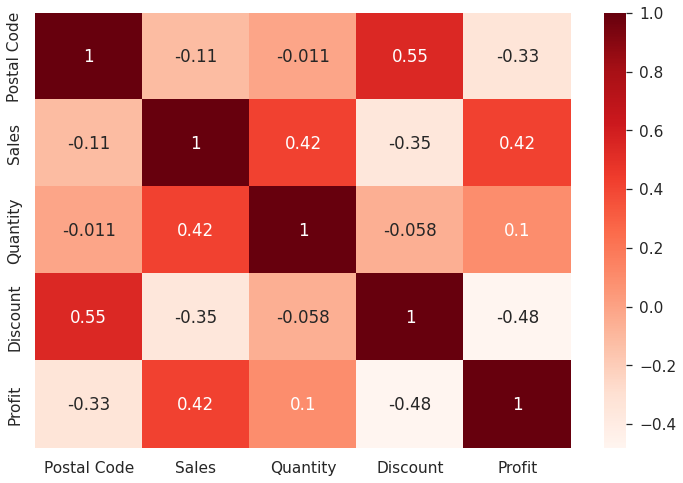

In [37]:
# Correlation matrix Heat Map to identify key factors influening profits
plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
sns.heatmap(gb_Category_Furniture.corr() , annot = True, cmap ="Reds")
plt.show()

### There is unusually high positive correlation between Postal Code and Discount
### Also, Their is negative correlation between Discount and Sales eventhough dicounts are entered as positive values... i.e. they are not helping in improving sales of "Furniture" category of the company


### 4.6 Investigating individual performance by states in the central region

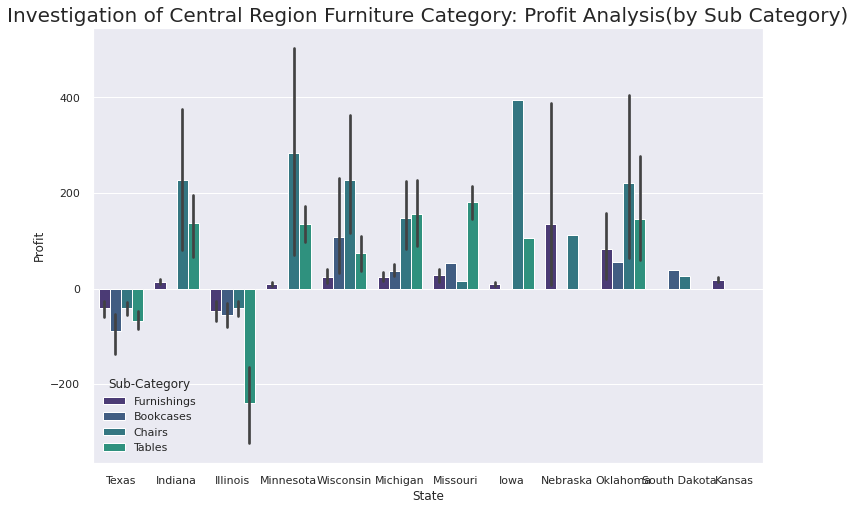

In [38]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Profit" ,hue = "Sub-Category")
plt.title("Investigation of Central Region Furniture Category: Profit Analysis(by Sub Category)", fontsize = 20)
plt.show()

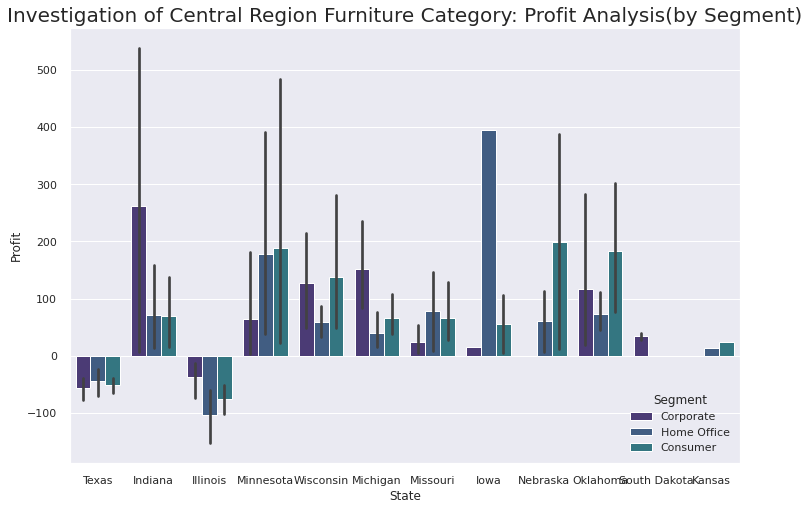

In [39]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Profit" ,hue = "Segment")
plt.title("Investigation of Central Region Furniture Category: Profit Analysis(by Segment)", fontsize = 20)
plt.show()

### Texas and Illiois are only two states contributing to all the losses in Furniture category in the Central Region 
### Losses in Tables Sub Category is significanlty high.

### 4.7 So, what is it they are doing diffrently?

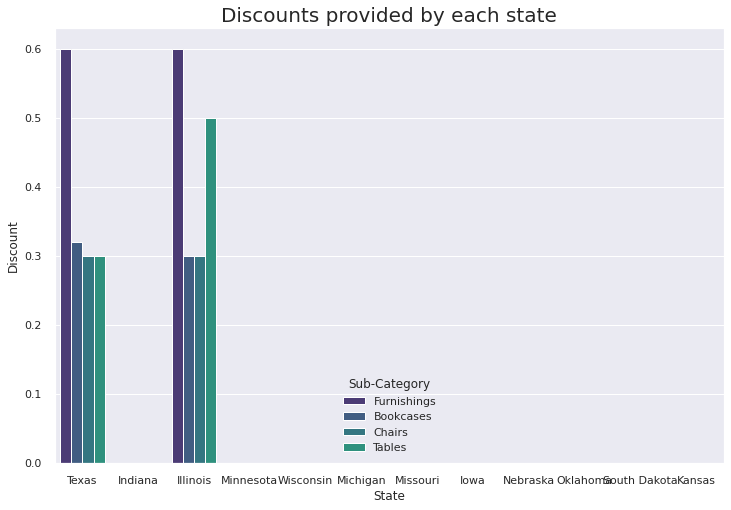

In [40]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Discount" ,hue = "Sub-Category")
plt.title("Discounts provided by each state", fontsize = 20)
plt.show()

### Texas and Illinois are only states providing discounts in the whole central region this justifies high positive correlation between postal codes and discounts.

### Also, these discounts are very high!
### 1. 60% on Furnishings
### 2. 30% on Bookcases and Chairs
### 3. 50% disount on Tables in Illinois and 30% in Texas
### 4. Are these discounts driving sales up?.... NO!

<Figure size 864x576 with 0 Axes>

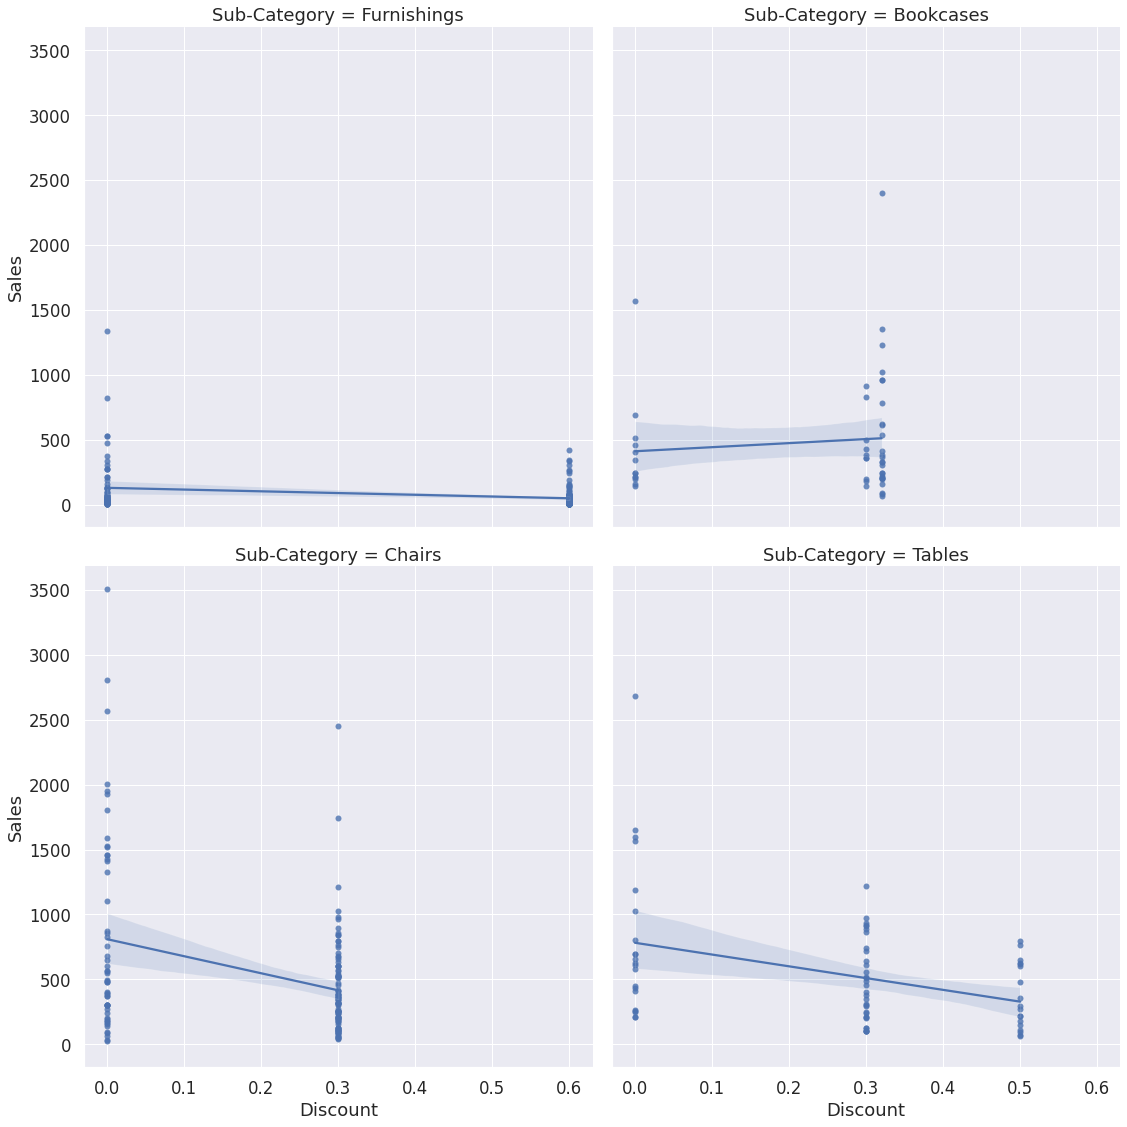

In [41]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1.5)
sns.lmplot(data = gb_Category_Furniture , x = "Discount", y ="Sales", aspect = 1, height = 8, col ="Sub-Category", col_wrap= 2)
plt.show()

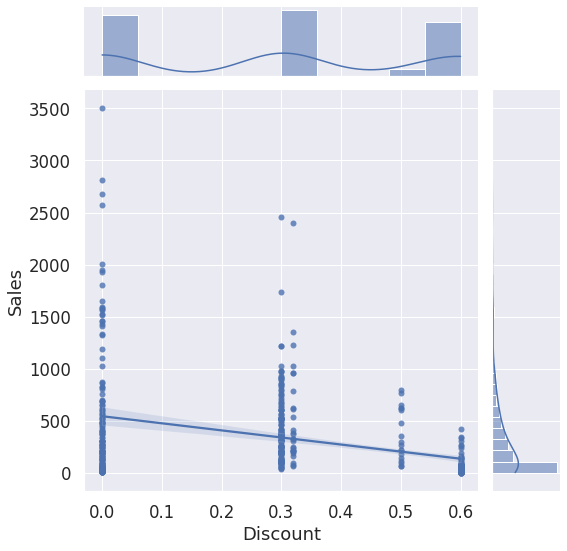

In [42]:
# Jiont plot for studying overall relationship between Sales and Discounts
sns.set(font_scale=1.5)
sns.jointplot(data = gb_Category_Furniture , x = "Discount", y ="Sales", height = 8, kind = "reg")
plt.show()

### Actually Sales tend to do down when discounts go up in 3 out of 4 "Subcategories" and also in overall Furniture Category Sales in the Central Region.

## Some more insights regarding Distribution of data 

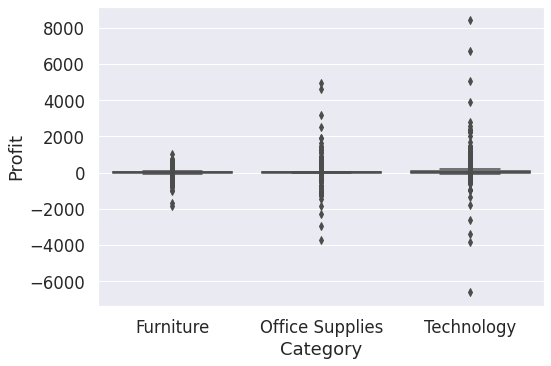

In [43]:
# box plot
sns.boxplot(x='Category',y='Profit',data=SuperStoreData)

we see that variation in Technology sector is more as compared to other two sector

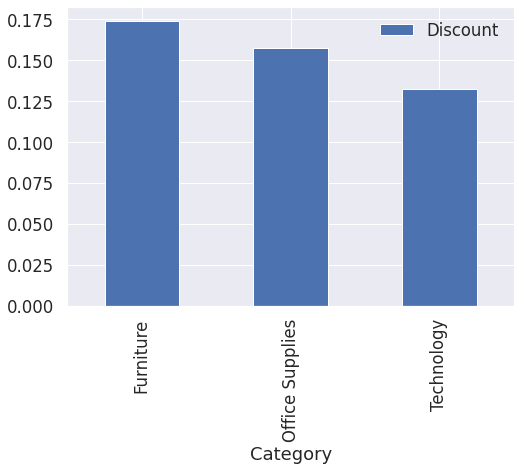

In [44]:
pivot=pd.pivot_table(SuperStoreData,index='Category',values='Discount')
pivot.plot(kind='bar')

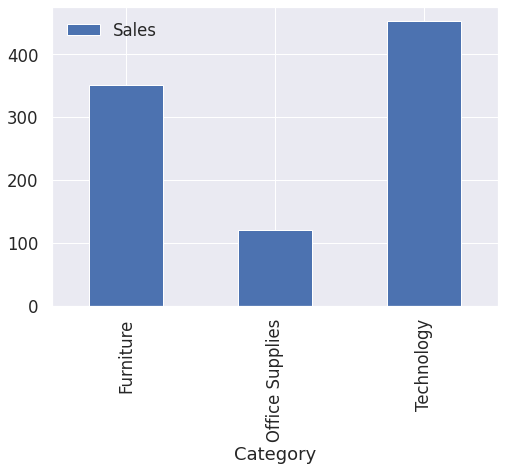

In [45]:
pivot=pd.pivot_table(SuperStoreData,index='Category',values='Sales')
pivot.plot(kind='bar')

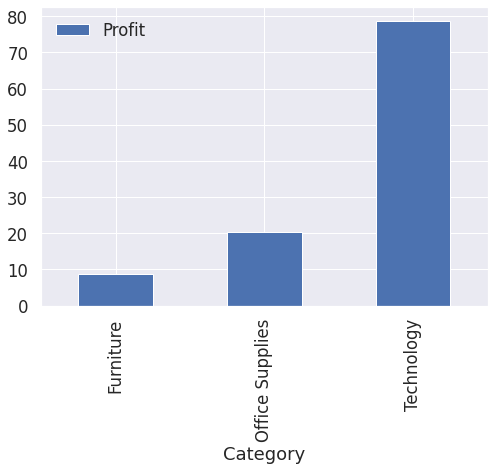

In [46]:
pivot=pd.pivot_table(SuperStoreData,index='Category',values='Profit')
pivot.plot(kind='bar')

### From above three plot we say that 
#### 1) More Discount is given in Furniture category and less Discount is given in Technology category businesses 
#### 2) Sales of Technology category businesses are more as compared to Furniture category 
#### 3) Profit of Technology category businesses are more as compared to Furniture category

# 5. Insights from Exploratory Data Analysis (Summary)


### 4.1 What are total Sales and Profits of the company?
  1. Total Sales = 2,296,195.56 USD
  2. Total Profits = 286,241.42 USD
  
### 4.2 Top 10 States by Sales and Profits
  1. #### Top 10 States by Sales:
'California', 'New York', 'Texas', 'Washington', 'Pennsylvania','Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'
  2. #### Top 10 States by Profit:
'California', 'New York', 'Washington', 'Michigan', 'Virginia','Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'
  3. #### Californi and New York are far ahead of their competitor states in terms of Profits.
  4. #### Discounts are triggering losses.
  
### 4.3 Distrubution of Profits across diffrent regions
  1. Overall each Segment is profitable.
  
### 4.4 Profit distribution by Region
 1. "Furniture" Category is the only loss making sector that to only in Central Region
 
### 4.5 Investigating losses in Furniture category in the Central region
 1. Losses are inccured in Furniture Cateory irrespective to ship mode
 2. There is unusually high positive correlation between Postal Code and Discount
 3. Also, Their is negative correlation between Discount and Sales eventhough dicounts are entered as positive values...i.e. they are not helping in improving sales of "Furniture" category of the company

### 4.6 Investigating individual performance by states in the central region
 1. Texas and Illiois are only two states contributing to all the losses in Furniture category in the Central Region 
 2. Losses in Tables Sub Category is significanlty high.
 
### 4.7 So, what is it they are doing diffrently?
 1. Texas and Illinois are only states providing discounts in the whole central region this justifies high positive correlation between postal codes and discounts.
 2. Also, these discounts are crazy high!
    1. 60% on Furnishings
    2. 30% on Bookcases and Chairs
    3. 50% disount on Tables in Illinois and 30% in Texas

### 4.8 Are these discounts driving sales up?.... NO!
 1. Actually Sales tend to do down when discounts go up in 3 out of 4 "Subcategories" and also in overall Furniture Category Sales in the Central Region.

## Conclusion

### From All these analysis we finally conclude that, 
#### 1) If we give more Discount on products our sales goes increses but Profit get down.
#### 2) In Technology category business we get more Profit as compared to other two business.These is because of we given less Discount.
#### 3) Here we also focus on our Office Supplies category business because sales of these category is less as compared to other two.
#### 4) Also Sales in 'Fasteners','labels'and 'Art' category are so weak.so we have to concentrate on these sub-category businesses.
#### 5) We have to concentrate on the Sales of 'West Virginia' State and 'San Luis Obispo' and 'Woodland' City. 

#### 6) To rise the profits , we first need to sell consumer segment products more .
#### 7) For enhancing the profits , we need to sell more to the states which are liking our products¶ like NEWYORK and CALIFORNIA .

### Hence To get good profit in any business you have to focus on increasing sales but not giving more discount